In [ ]:
%reload_ext autoreload
%autoreload 2

In [1]:
import os,sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

os.chdir('..')

In [3]:
from src.loader import DataLoader

loader = DataLoader()

table_name = 'xdr_data'
df = loader.load_data(table_name)



In [5]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [6]:
customer_info = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Handset Type': 'first',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
})

In [8]:
# Top 10 TCP values
top_10_tcp = pd.concat([df['TCP DL Retrans. Vol (Bytes)'], df['TCP UL Retrans. Vol (Bytes)']]).nlargest(10)
# Bottom 10 TCP values
bottom_10_tcp = pd.concat([df['TCP DL Retrans. Vol (Bytes)'], df['TCP UL Retrans. Vol (Bytes)']]).nsmallest(10)
# Most frequent TCP values
most_frequent_tcp = pd.concat([df['TCP DL Retrans. Vol (Bytes)'], df['TCP UL Retrans. Vol (Bytes)']]).value_counts().head(10)


In [9]:
# Top 10 RTT values
top_10_rtt = pd.concat([df['Avg RTT DL (ms)'], df['Avg RTT UL (ms)']]).nlargest(10)
# Bottom 10 RTT values
bottom_10_rtt = pd.concat([df['Avg RTT DL (ms)'], df['Avg RTT UL (ms)']]).nsmallest(10)
# Most frequent RTT values
most_frequent_rtt = pd.concat([df['Avg RTT DL (ms)'], df['Avg RTT UL (ms)']]).value_counts().head(10)



In [10]:
# Top 10 Throughput values
top_10_throughput = pd.concat([df['Avg Bearer TP DL (kbps)'], df['Avg Bearer TP UL (kbps)']]).nlargest(10)
# Bottom 10 Throughput values
bottom_10_throughput = pd.concat([df['Avg Bearer TP DL (kbps)'], df['Avg Bearer TP UL (kbps)']]).nsmallest(10)
# Most frequent Throughput values
most_frequent_throughput = pd.concat([df['Avg Bearer TP DL (kbps)'], df['Avg Bearer TP UL (kbps)']]).value_counts().head(10)

In [15]:
df=df.head(100)
avg_throughput_per_handset = df.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean()
plt.figure(figsize=(100, 60))
avg_throughput_per_handset.plot(kind='bar', color='skyblue')
plt.title('Average Throughput per Handset Type')
# plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

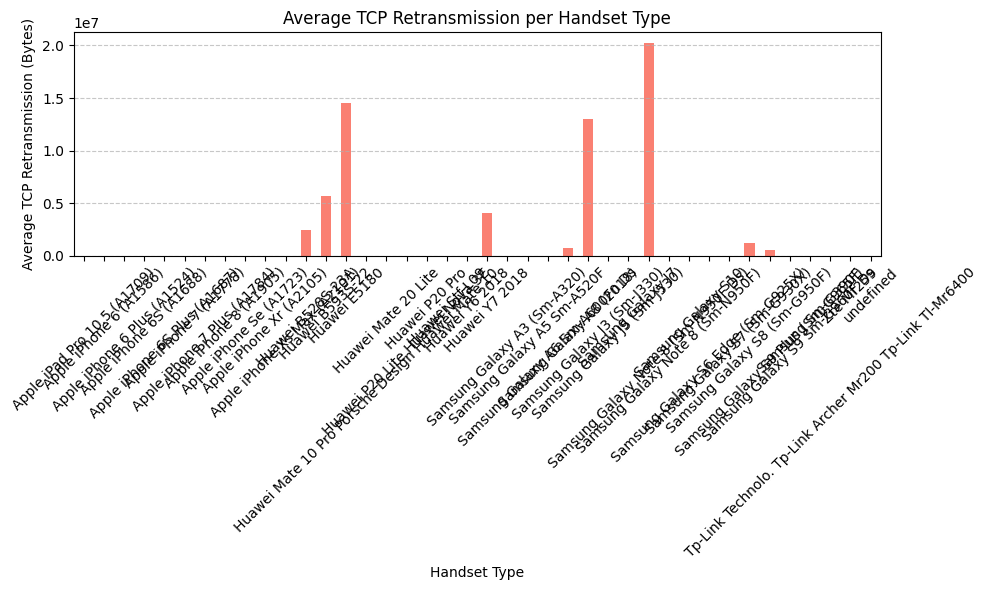

In [16]:
avg_tcp_retrans_per_handset = df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean()
plt.figure(figsize=(10, 6))
avg_tcp_retrans_per_handset.plot(kind='bar', color='salmon')
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
X = customer_info[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                   'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                   'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]


In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to customer_info
customer_info['Cluster'] = kmeans.labels_

# Describe each cluster
cluster_description = customer_info.groupby('Cluster').mean()
print(cluster_description)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values